In [1]:
!pip install d2l==1.0.0-beta0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.6/141.6 KB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.6/155.6 KB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.0/121.0 KB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 KB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.1 MB/s eta 0:00:00
  Created wheel for gym: filename=gym-0.21.0-py3-none-any.whl size=1616825 sha256=a90706598414eea80e30d35763b05298fb6d207c6e1c578354476748992ea35d
  Stored in directory: /root/.cache/pip/wheels/27/6d/b3/a3a6e10704795c9b9000f1ab2dc480dfe7bed42f5972806e73
Successfully built gym
  Attempting uninstal

In [2]:
import torch
from torch import nn
from d2l import torch as d2l

In [3]:
class MLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, num_hiddens_1, num_hiddens_2, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(), nn.LazyLinear(num_hiddens),
                                 nn.ReLU(), nn.Dropout(0.3), nn.LazyLinear(num_hiddens_1), nn.ReLU(), nn.Dropout(0.3), nn.LazyLinear(num_hiddens_2), nn.ReLU(), nn.Dropout(0.3), nn.LazyLinear(num_outputs))

In [4]:
@d2l.add_to_class(d2l.Classifier)
def training_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        Y_hat = self(*batch[:-1])
        self.plot('loss', l, train=True)
        self.plot('acc', self.accuracy(Y_hat, batch[-1]), train=True)
        return l

In [5]:
@d2l.add_to_class(d2l.Classifier)
def validation_step(self, batch):
        Y_hat = self(*batch[:-1])
        self.plot('acc', self.accuracy(Y_hat, batch[-1]), train=False)

In [6]:
@d2l.add_to_class(d2l.Classifier)
def configure_optimizers(self):
        return torch.optim.SGD(self.parameters(), lr=self.lr, weight_decay=0.01)


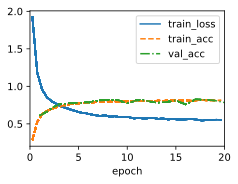

In [7]:
model = MLP(num_outputs=10, num_hiddens=256, num_hiddens_1=128, num_hiddens_2=64, lr=0.1)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=20)
trainer.fit(model, data)

In [8]:
torch.save(model.state_dict(), 'mlp.params3')

In [9]:
clone = MLP(num_outputs=10, num_hiddens=256, num_hiddens_1=128, num_hiddens_2=64, lr=0.1)

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [11]:
clone.load_state_dict(torch.load('mlp.params3'))
clone.eval()

MLP(
  (net): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): LazyLinear(in_features=0, out_features=256, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): LazyLinear(in_features=0, out_features=128, bias=True)
    (5): ReLU()
    (6): Dropout(p=0.3, inplace=False)
    (7): LazyLinear(in_features=0, out_features=64, bias=True)
    (8): ReLU()
    (9): Dropout(p=0.3, inplace=False)
    (10): LazyLinear(in_features=0, out_features=10, bias=True)
  )
)

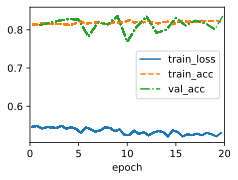

In [12]:
trainer.fit(clone, data)